In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.1
Pandas Version 1.2.4
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


# Read the Data

In [3]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
CTC= pd.read_csv('expected_ctc.csv')
CTC.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [4]:
pd.options.display.max_columns = None

In [5]:
CTC.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [6]:
## Checking the shape of the data: Number of columns and rows

CTC.shape

(25000, 29)

In [7]:
CTC["Department"].value_counts()

Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

In [8]:
CTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [9]:
### Examine missing values
CTC_na = CTC.isna().sum()
CTC_na[CTC_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

PHD_Specialization            11881
University_PHD                11881
Passing_Year_Of_PHD           11881
PG_Specialization              7692
University_PG                  7692
Passing_Year_Of_PG             7692
Graduation_Specialization      6180
University_Grad                6180
Passing_Year_Of_Graduation     6180
Designation                    3129
Department                     2778
Role                            963
Industry                        908
Organization                    908
Last_Appraisal_Rating           908
dtype: int64

PHD_Specialization            11881

University_PHD                11881

Passing_Year_Of_PHD           11881

University_PG                  7692

Passing_Year_Of_PG             7692

University_Grad                6180

Passing_Year_Of_Graduation     6180

All these features have high percentage of missing values and hence these features would be dropped from analysis. We are dropping them from our dataset to make sure that other valid observations do not get eliminated when we remove or impute the 'na' values.


In [10]:
CTC.drop(['PHD_Specialization', 'University_PHD','Passing_Year_Of_PHD','University_PG','Passing_Year_Of_PG' ,'University_Grad','Passing_Year_Of_Graduation'],axis='columns', inplace=True)                           

In [11]:
CTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   IDX                                25000 non-null  int64 
 1   Applicant_ID                       25000 non-null  int64 
 2   Total_Experience                   25000 non-null  int64 
 3   Total_Experience_in_field_applied  25000 non-null  int64 
 4   Department                         22222 non-null  object
 5   Role                               24037 non-null  object
 6   Industry                           24092 non-null  object
 7   Organization                       24092 non-null  object
 8   Designation                        21871 non-null  object
 9   Education                          25000 non-null  object
 10  Graduation_Specialization          18820 non-null  object
 11  PG_Specialization                  17308 non-null  object
 12  Cure

In [12]:
CTC.isnull().sum()

IDX                                     0
Applicant_ID                            0
Total_Experience                        0
Total_Experience_in_field_applied       0
Department                           2778
Role                                  963
Industry                              908
Organization                          908
Designation                          3129
Education                               0
Graduation_Specialization            6180
PG_Specialization                    7692
Curent_Location                         0
Preferred_location                      0
Current_CTC                             0
Inhand_Offer                            0
Last_Appraisal_Rating                 908
No_Of_Companies_worked                  0
Number_of_Publications                  0
Certifications                          0
International_degree_any                0
Expected_CTC                            0
dtype: int64

In [13]:
CTC=CTC.fillna(method='pad')

In [14]:
CTC.isnull().sum()

IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           1
Role                                 1
Industry                             1
Organization                         1
Designation                          1
Education                            0
Graduation_Specialization            0
PG_Specialization                    1
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                1
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
CTC["Department"].fillna(CTC["Department"].mode(),inplace=True)

In [17]:
CTC["Role"].fillna(CTC["Department"].mode(),inplace=True)

In [18]:
CTC["Industry"].fillna(CTC["Industry"].mode(),inplace=True)

In [19]:
CTC["Organization"].fillna(CTC["Organization"].mode(),inplace=True)

In [20]:
CTC["Designation"].fillna(CTC["Designation"].mode(),inplace=True)

In [21]:
CTC["PG_Specialization"].fillna(CTC["PG_Specialization"].mode(),inplace=True)

In [22]:
CTC["Last_Appraisal_Rating"].fillna(CTC["Last_Appraisal_Rating"].mode(),inplace=True)

In [23]:
CTC.isnull().sum()

IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
PG_Specialization                    0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [24]:
Expected_CTC = pd.ExcelWriter('CTC.xlsx')
  
# write DataFrame to excel
CTC.to_excel("C:\\Users\\Arun Sivaji\\ANN\\Expected_CTC-2.xlsx")


In [25]:
### Let's examine the target column which is price

CTC.describe(include="all")["Expected_CTC"]

count     2.500000e+04
unique             NaN
top                NaN
freq               NaN
mean      2.250155e+06
std       1.160480e+06
min       2.037440e+05
25%       1.306278e+06
50%       2.252136e+06
75%       3.051354e+06
max       5.599570e+06
Name: Expected_CTC, dtype: float64

In [26]:
CTC.Expected_CTC.unique()

array([ 384551, 3783729, 3131325, ..., 1934065, 4370638, 1216666],
      dtype=int64)

In [27]:
CTC.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0
Certifications,25000.0,7.736800e-01,1.199449e+00,0.0,0.00,0.0,1.00,5.0
International_degree_any,25000.0,8.172000e-02,2.739431e-01,0.0,0.00,0.0,0.00,1.0
Expected_CTC,25000.0,2.250155e+06,1.160480e+06,203744.0,1306277.50,2252136.5,3051353.75,5599570.0


In [28]:
CTC.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDX,25000.0,NaN,NaN,NaN,12500.5,7217.022701,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,NaN,NaN,NaN,34993.24008,14390.271591,10000.0,22563.75,34974.5,47419.0,60000.0
Total_Experience,25000.0,NaN,NaN,NaN,12.49308,7.471398,0.0,6.0,12.0,19.0,25.0
Total_Experience_in_field_applied,25000.0,NaN,NaN,NaN,6.2582,5.819513,0.0,1.0,5.0,10.0,25.0
Department,25000,12,Marketing,2711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role,25000,25,Others,2341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,25000,11,Insurance,2316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organization,25000,16,M,1635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,25000,18,HR,1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,25000,4,PG,6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
CTC["Expected_CTC"].value_counts().sort_index()

203744     1
203756     1
209131     1
211961     1
213752     1
          ..
5570909    1
5574693    1
5583204    1
5586046    1
5599570    1
Name: Expected_CTC, Length: 24913, dtype: int64

In [30]:
#Let's look at the distribution of price at different percentiles
print("0.5% candiates have a Expected_CTC lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 0.5)))
print("  1% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 1)))
print("  5% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 5)))
print(" 10% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 10)))
print(" 90% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 90)))
print(" 95% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 95)))
print(" 99% candiates have a Expected_CTC lower lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 99)))
print("99.5%candiates have a Expected_CTC lower than {0: .2f}".format(np.percentile(CTC["Expected_CTC"], 99.5)))

0.5% candiates have a Expected_CTC lower than  357268.93
  1% candiates have a Expected_CTC lower lower than  385088.13
  5% candiates have a Expected_CTC lower lower than  577473.50
 10% candiates have a Expected_CTC lower lower than  681085.10
 90% candiates have a Expected_CTC lower lower than  3796165.40
 95% candiates have a Expected_CTC lower lower than  4360145.10
 99% candiates have a Expected_CTC lower lower than  5118043.60
99.5%candiates have a Expected_CTC lower than  5266528.40


In [31]:
dups = CTC.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(CTC.shape)

Number of duplicate rows = 0
(25000, 22)


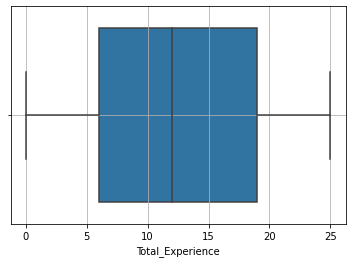

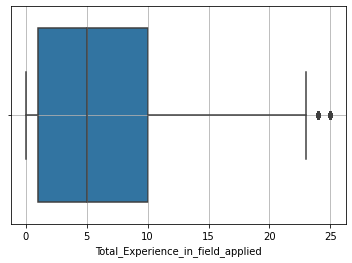

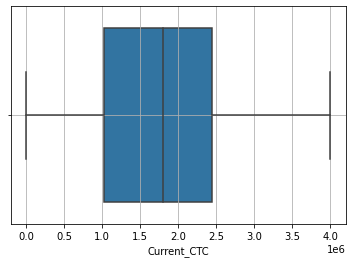

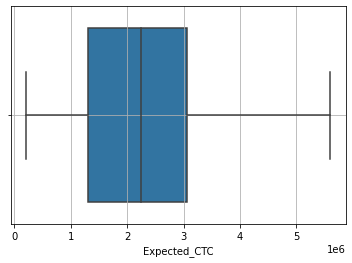

In [32]:
cols = ['Total_Experience','Total_Experience_in_field_applied','Current_CTC','Expected_CTC']
for i in cols:
    sns.boxplot(CTC[i],whis=1.5)
    plt.grid()
    plt.show();

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for column in CTC[cols].columns:
    lr,ur=remove_outlier(CTC[column])
    CTC[column]=np.where(CTC[column]>ur,ur,CTC[column])
    CTC[column]=np.where(CTC[column]<lr,lr,CTC[column])

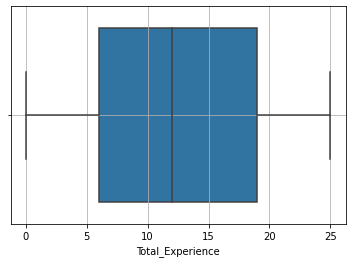

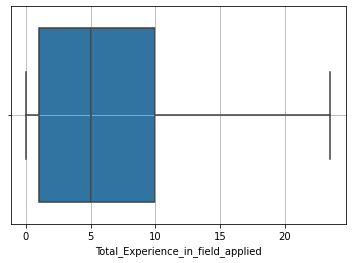

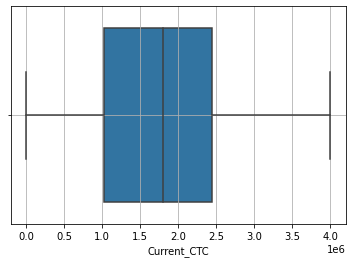

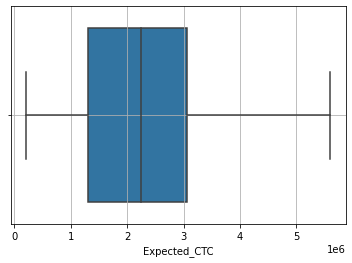

In [35]:
cols = ['Total_Experience','Total_Experience_in_field_applied','Current_CTC','Expected_CTC']
for i in cols:
    sns.boxplot(CTC[i],whis=1.5)
    plt.grid()
    plt.show();

Text(0.5, 1.0, 'Expected_CTC')

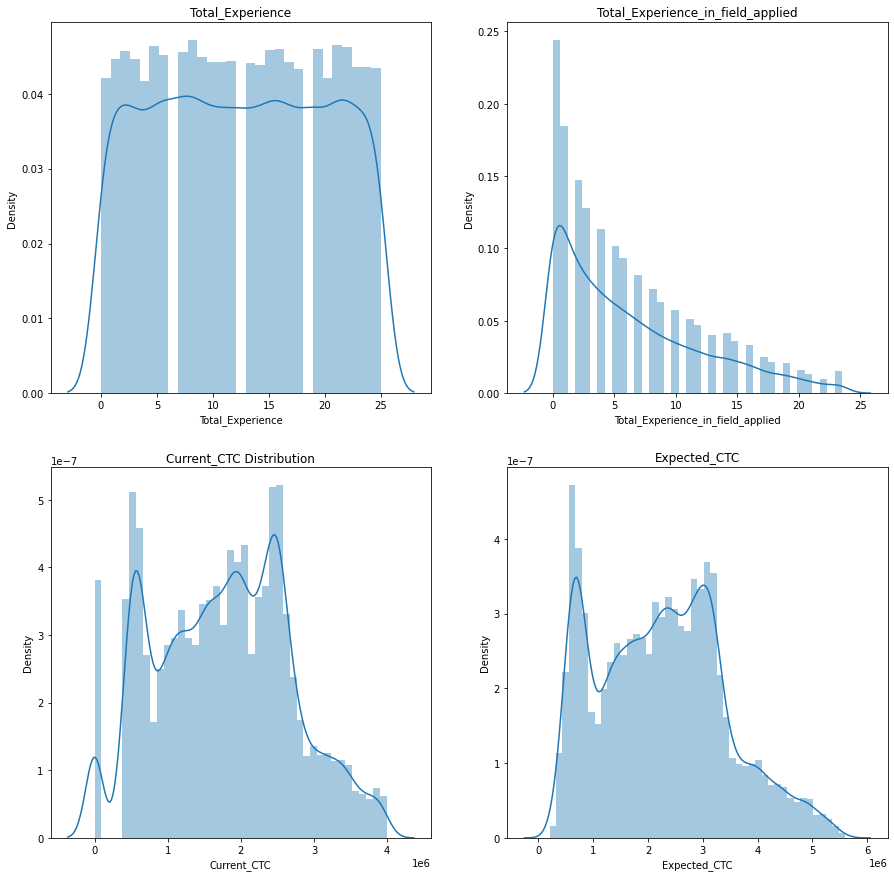

In [36]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,15)
a = sns.distplot(CTC['Total_Experience'] , ax=axes[0][0])
a.set_title("Total_Experience",fontsize=12)

a = sns.distplot(CTC['Total_Experience_in_field_applied'] ,ax=axes[0][1])
a.set_title("Total_Experience_in_field_applied",fontsize=12)

a=sns.distplot(CTC['Current_CTC'], ax=axes[1][0])
a.set_title("Current_CTC Distribution",fontsize=12)

a=sns.distplot(CTC['Expected_CTC'], ax=axes[1][1])
a.set_title("Expected_CTC", fontsize=12)

In [37]:
CTC.corr()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
IDX,1.000000,0.006398,-0.006057,-0.007240,-0.007226,-0.002094,0.003233,0.002833,-0.001670,-0.006239
Applicant_ID,0.006398,1.000000,-0.007831,-0.005495,-0.011724,-0.005943,-0.006884,-0.004531,-0.001621,-0.009300
Total_Experience,-0.006057,-0.007831,1.000000,0.645356,0.846476,0.398135,-0.000494,-0.001130,0.084072,0.816593
Total_Experience_in_field_applied,-0.007240,-0.005495,0.645356,1.000000,0.548523,0.249413,-0.010641,-0.002747,0.043067,0.529583
Current_CTC,-0.007226,-0.011724,0.846476,0.548523,1.000000,0.379740,-0.006399,-0.143402,0.078774,0.986718
No_Of_Companies_worked,-0.002094,-0.005943,0.398135,0.249413,0.379740,1.000000,0.000608,0.012990,0.047270,0.343150
Number_of_Publications,0.003233,-0.006884,-0.000494,-0.010641,-0.006399,0.000608,1.000000,0.018549,0.016419,0.001518
Certifications,0.002833,-0.004531,-0.001130,-0.002747,-0.143402,0.012990,0.018549,1.000000,0.009298,-0.173992
International_degree_any,-0.001670,-0.001621,0.084072,0.043067,0.078774,0.047270,0.016419,0.009298,1.000000,0.074557
Expected_CTC,-0.006239,-0.009300,0.816593,0.529583,0.986718,0.343150,0.001518,-0.173992,0.074557,1.000000


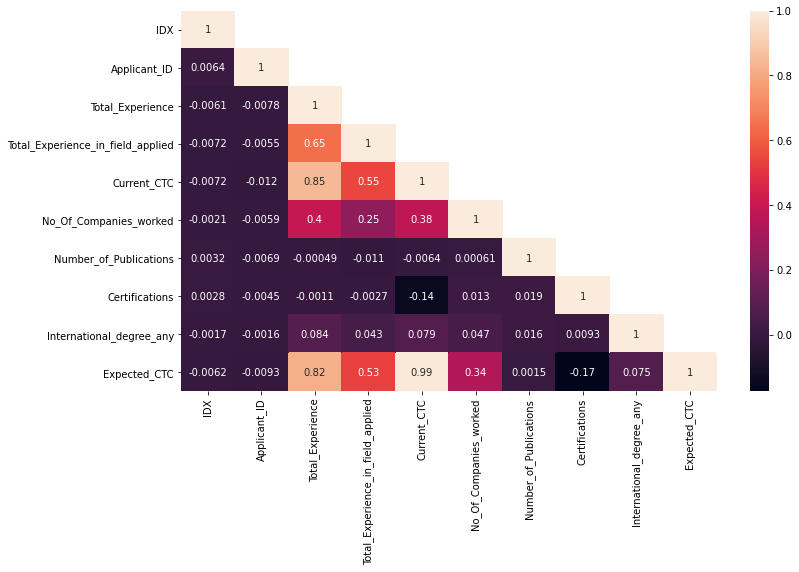

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(CTC.corr(), annot=True,mask=np.triu(CTC.corr(),+1));

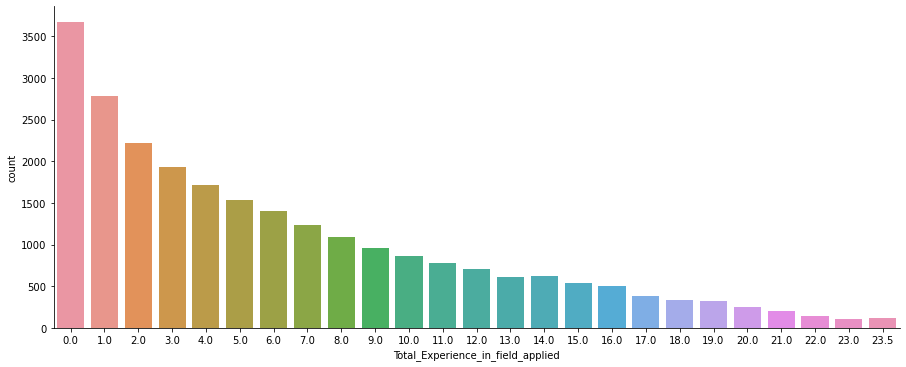

In [39]:
sns.catplot('Total_Experience_in_field_applied', data=CTC, kind='count',aspect=2.5)

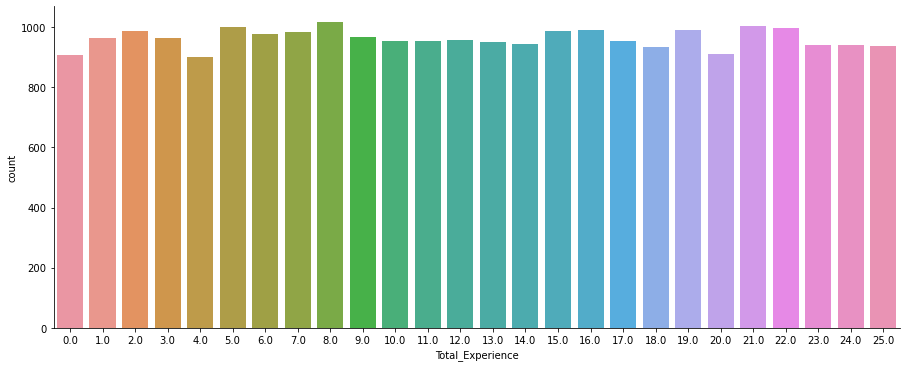

In [40]:
sns.catplot('Total_Experience', data=CTC, kind='count',aspect=2.5)

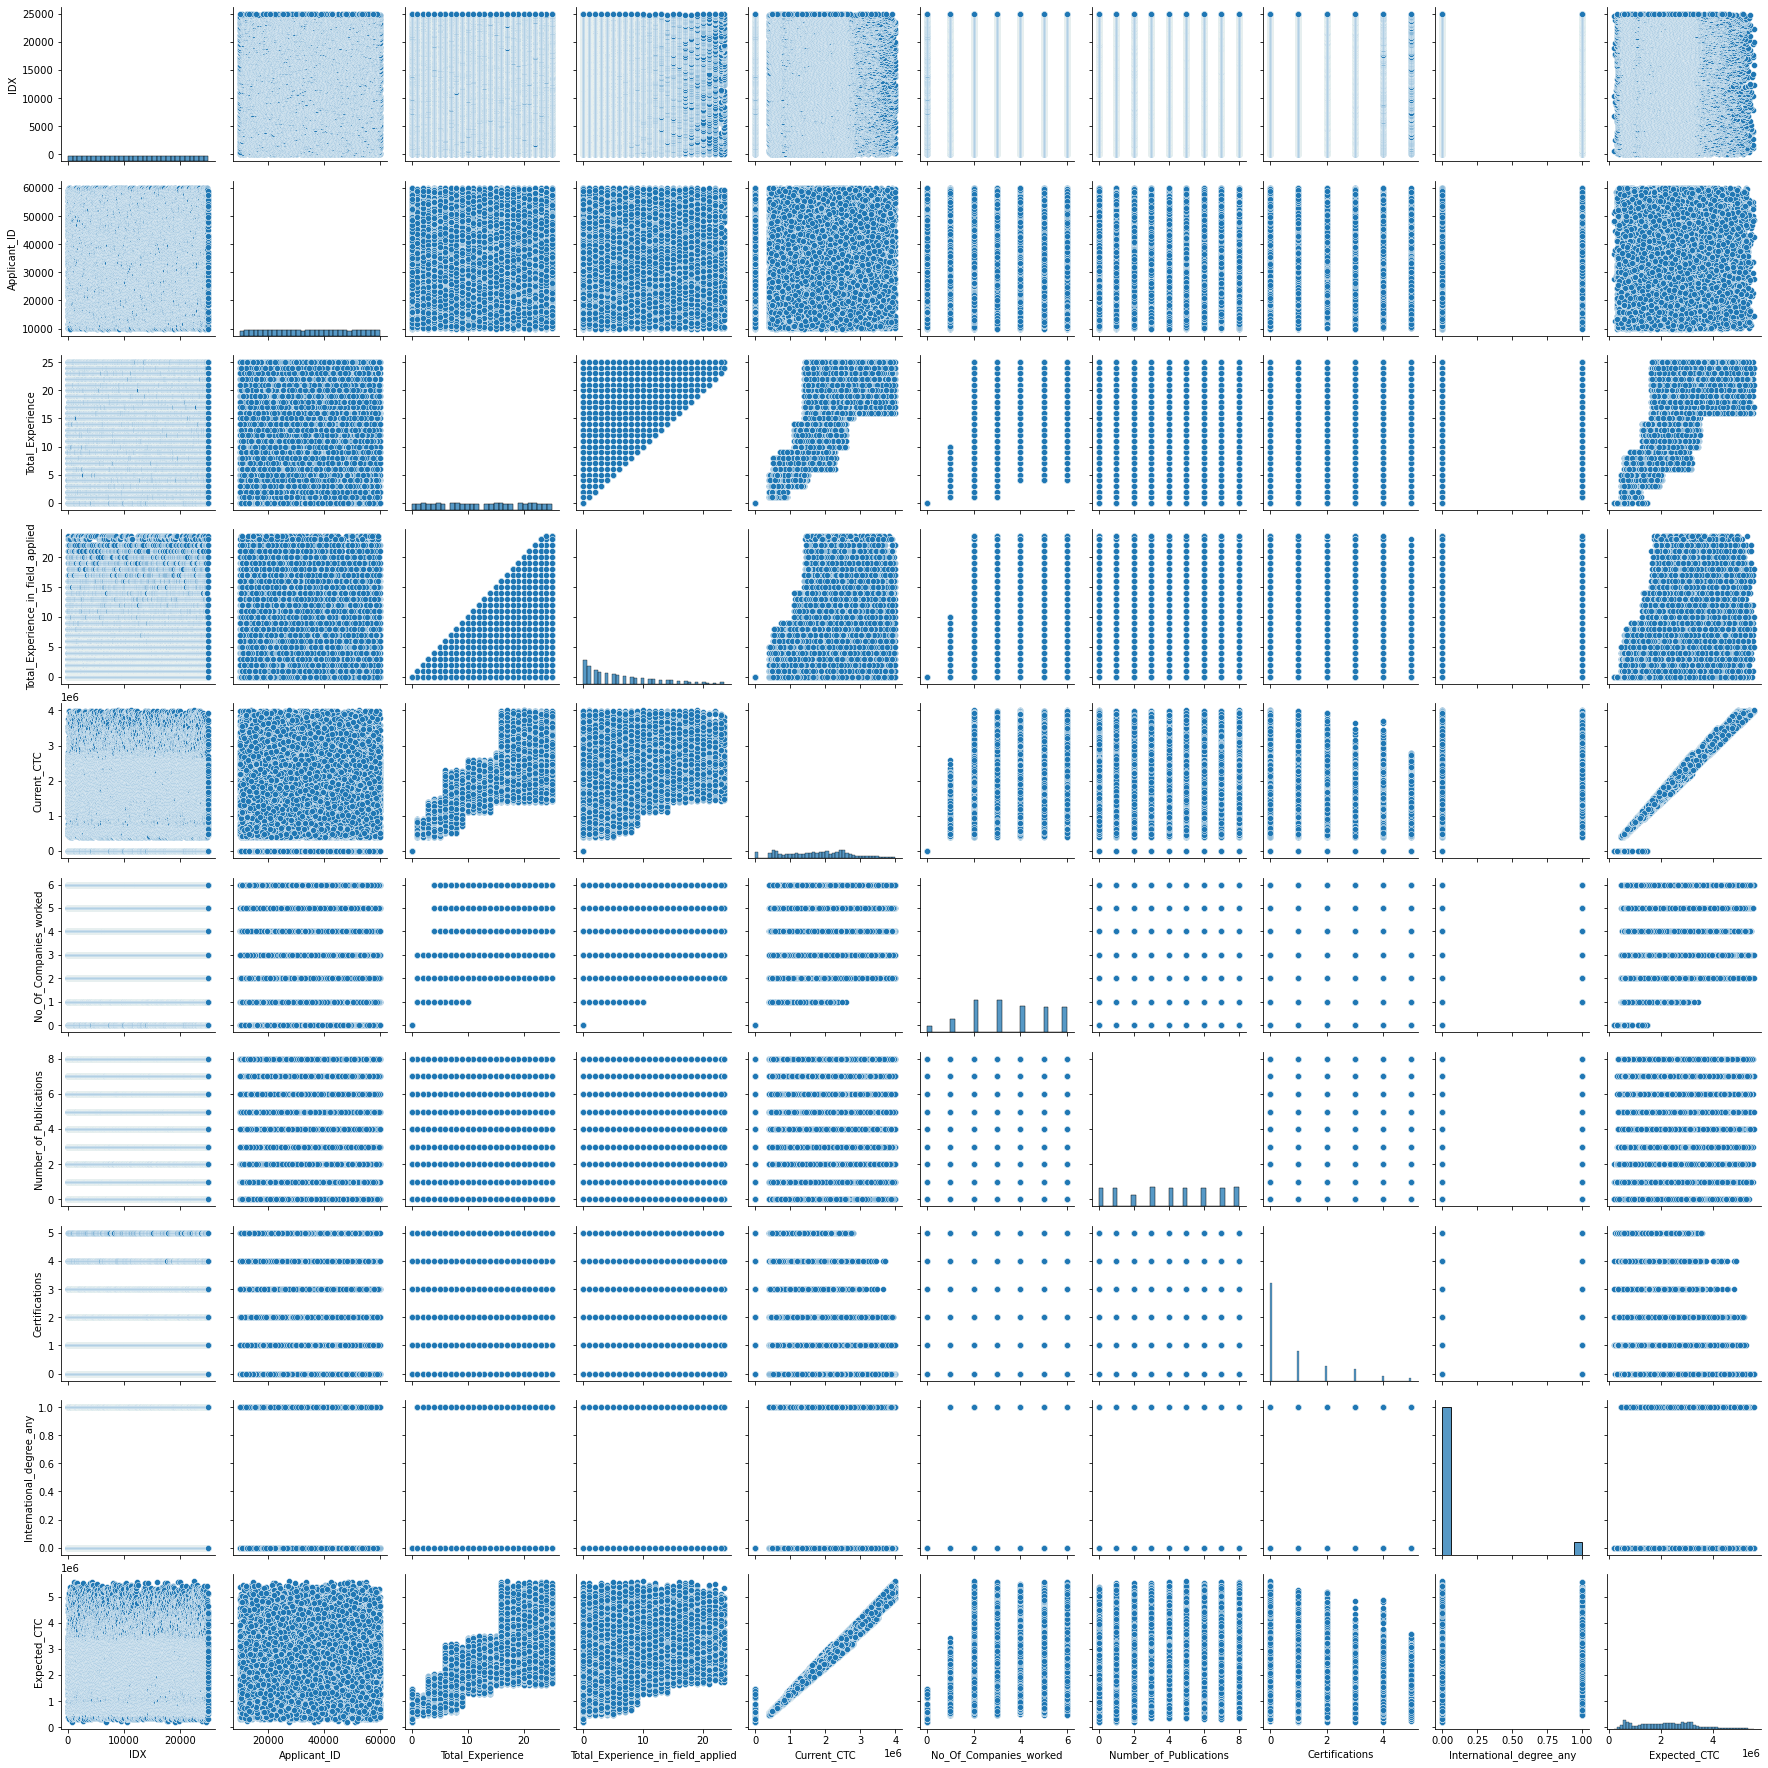

In [41]:
sns.pairplot(CTC,diag_kind="hist");

In [42]:
CTC["log_Expected_CTC"]=np.log(CTC["Expected_CTC"]+1)

In [43]:
CTC["log_Current_CTC"]=np.log(CTC["Current_CTC"]+1)

In [44]:
CTC["log_Expected_CTC"]

0        12.859834
1        15.146221
2        14.956967
3        14.774414
4        14.613644
           ...    
24995    15.304851
24996    14.378567
24997    14.475135
24998    15.290420
24999    14.011626
Name: log_Expected_CTC, Length: 25000, dtype: float64

Text(0.5, 1.0, 'log_Expected_CTC')

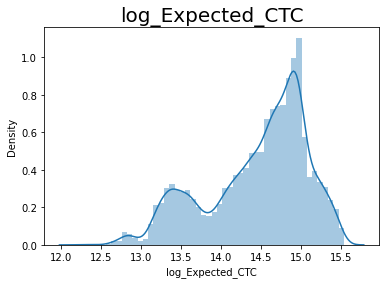

In [45]:
a = sns.distplot(CTC['log_Expected_CTC'])
a.set_title("log_Expected_CTC",fontsize=20)

Text(0.5, 1.0, 'log_Current_CTC')

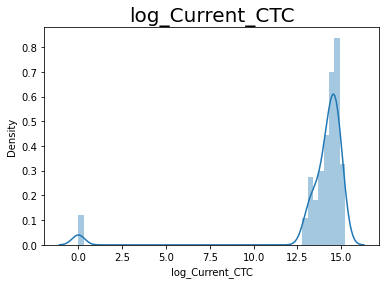

In [46]:
b= sns.distplot(CTC['log_Current_CTC'])
b.set_title("log_Current_CTC",fontsize=20)

In [47]:
CTC.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,log_Expected_CTC,log_Current_CTC
0,1,22753,0.0,0.0,Marketing,Marketing,Insurance,M,HR,PG,Arts,Mathematics,Guwahati,Pune,0.0,N,B,0,0,0,0,384551.0,12.859834,0.000000
1,2,51087,23.0,14.0,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Others,Bangalore,Nagpur,2702664.0,Y,Key_Performer,2,4,0,0,3783729.0,15.146221,14.809749
2,3,38413,21.0,12.0,Top Management,Consultant,Training,J,HR,Doctorate,Zoology,Zoology,Ahmedabad,Jaipur,2236661.0,Y,Key_Performer,5,3,0,0,3131325.0,14.956967,14.620495
3,4,11501,15.0,8.0,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Zoology,Kanpur,Kolkata,2100510.0,N,C,5,3,0,0,2608833.0,14.774414,14.557691
4,5,58941,10.0,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Zoology,Ahmedabad,Ahmedabad,1931644.0,N,C,2,3,0,0,2221390.0,14.613644,14.473883


In [48]:
CTC.tail()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,log_Expected_CTC,log_Current_CTC
24995,24996,25550,18.0,13.0,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,Psychology,Psychology,Kanpur,Mumbai,3410899.0,N,B,3,6,0,0,4434168.0,15.304851,15.042487
24996,24997,53442,12.0,8.0,HR,Others,Analytics,B,Sr.Manager,Under Grad,Psychology,Psychology,Bangalore,Nagpur,1350793.0,Y,B,6,7,0,0,1756030.0,14.378567,14.116203
24997,24998,15777,22.0,8.0,Banking,Head,Insurance,D,Software Developer,Under Grad,Psychology,Psychology,Pune,Delhi,1681796.0,N,C,4,5,2,0,1934065.0,14.475135,14.335373
24998,24999,57616,25.0,8.0,Marketing,CEO,BFSI,D,Marketing Manager,PG,Economics,Economics,Delhi,Pune,3311090.0,Y,B,3,1,1,0,4370638.0,15.290420,15.012788
24999,25000,20788,8.0,0.0,Banking,Consultant,Automobile,P,Sr.Manager,Grad,Economics,Economics,Surat,Mangalore,935897.0,N,A,2,6,0,0,1216666.0,14.011626,13.749262


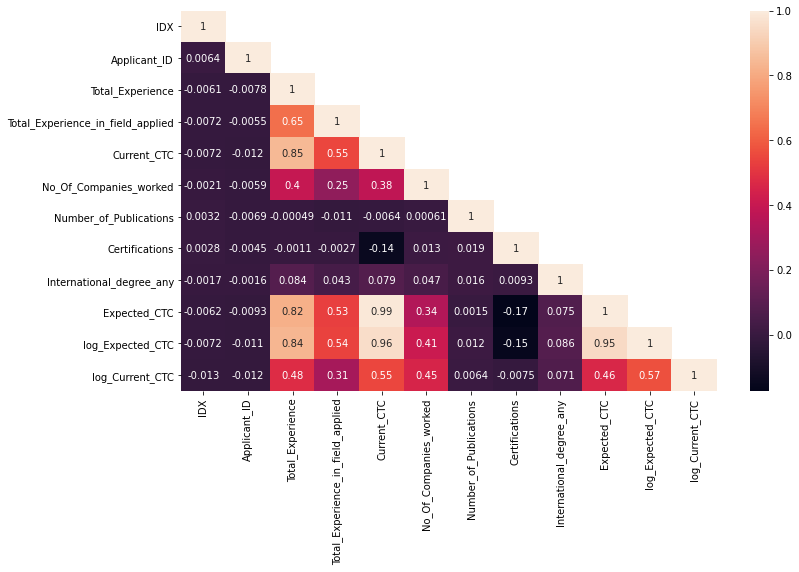

In [49]:
plt.figure(figsize=(12,7))
sns.heatmap(CTC.corr(), annot=True,mask=np.triu(CTC.corr(),+1));

In [50]:
for column in CTC.columns:
    if CTC[column].dtype == 'object':
        print(column.upper(),': ',CTC[column].nunique())
        print(CTC[column].value_counts().sort_values())
        print('\n')

DEPARTMENT :  12
IT-Software       1188
Accounts          1264
Top Management    1847
Engineering       2155
Banking           2195
Education         2208
HR                2223
Sales             2229
Others            2305
Healthcare        2316
Analytics/BI      2359
Marketing         2711
Name: Department, dtype: int64


ROLE :  25
Marketing                  1
Lab Executuve             26
Professor                 33
Research Scientist        36
Sr. Business Analyst     117
Researcher               126
Senior Analyst           135
Area Sales Manager       135
Principal Analyst        287
Data scientist           384
Associate                794
Head                    1157
Scientist               1187
CEO                     1193
Financial Analyst       1225
Senior Researcher       1292
Sales Manager           1482
Sales Execituve         1638
Business Analyst        1778
Consultant              1844
Team Lead               1901
Project Manager         1943
Analyst                 1

In [51]:
CTC.isnull().sum() 

IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
PG_Specialization                    0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
log_Expected_CTC                     0
log_Current_CTC                      0
dtype: int64

In [52]:
CTC['Education'].replace(['Under Grad', 'Grad','Doctorate','PG'],
                        [0,1,2,3], inplace=True)

In [53]:
CTC['Last_Appraisal_Rating'].replace(['Key_Performer', 'A','C','D','B'],
                        [0,1,2,3,4], inplace=True)

In [54]:
CTC['Inhand_Offer'].replace(['Y','N'],
                        [0,1], inplace=True)

In [55]:
CTC['PG_Specialization'].replace(['Arts','Sociology','Botony','Psychology','Zoology','Others','Statistics','Engineering','Economics','Chemistry','Mathematics'],
                        [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [56]:
CTC['Graduation_Specialization'].replace(['Statistics','Others','Engineering','Psychology','Arts','Botony','Zoology','Chemistry','Sociology','Economics','Mathematics'],
                        [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [57]:
CTC['Designation'].replace(['Scientist','Research Scientist','CA','Director','Network Engineer','Web Designer','Software Developer','Medical Officer','Research Analyst','Data Analyst','Assistant Manager','Consultant','Marketing Manager','Manager','Product Manager','Sr.Manager','Others','HR'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True)

In [58]:
CTC['Organization'].replace(['D','O','N','I','E','L','C','B','G','F','K','A','J','H','P','M'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)

In [59]:
CTC['Industry'].replace(['Others','FMCG','Aviation','Analytics','BFSI','Telecom','Retail','Automobile','Training','IT','Insurance'],
                        [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [60]:
CTC['Role'].replace(['Marketing','Lab Executuve','Professor','Research Scientist','Sr. Business Analyst','Researcher','Area Sales Manager','Senior Analyst','Principal Analyst','Data scientist','Associate','Head','Scientist','CEO','Financial Analyst','Senior Researcher','Sales Manager','Sales Execituve','Business Analyst','Consultant','Team Lead','Project Manager','Analyst','Bio statistician','Others'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], inplace=True)

In [61]:
CTC['Department'].replace(['IT-Software','Accounts','Top Management','Engineering','Banking','Education','HR','Sales','Others','Healthcare','Analytics/BI','Marketing'],
                        [0, 1,2,3,4,5,6,7,8,9,10,11], inplace=True)

In [62]:
CTC['Curent_Location'].replace(['Surat','Kolkata','Pune','Lucknow','Mumbai','Nagpur','Kanpur','Chennai','Guwahati','Ahmedabad','Delhi','Mangalore','Bhubaneswar','Jaipur','Bangalore'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)

In [63]:
CTC['Preferred_location'].replace(['Bangalore','Lucknow','Mumbai','Nagpur','Bhubaneswar','Pune','Jaipur','Kolkata','Chennai','Delhi','Surat','Mangalore','Guwahati','Ahmedabad','Kanpur'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)

In [64]:
CTC.drop(['Applicant_ID','IDX'],axis='columns', inplace=True)                           

In [65]:
CTC.drop(['Current_CTC','Expected_CTC'],axis='columns', inplace=True)                           

In [66]:
CTC.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,log_Expected_CTC,log_Current_CTC
0,0.0,0.0,11,0,10,15,17,3,4,10,8,5,1,4,0,0,0,0,12.859834,0.000000
1,23.0,14.0,6,19,3,13,17,2,7,5,14,3,0,0,2,4,0,0,15.146221,14.809749
2,21.0,12.0,2,19,8,12,17,2,6,4,9,6,0,0,5,3,0,0,14.956967,14.620495
3,15.0,8.0,4,14,2,9,17,2,1,4,6,7,1,2,5,3,0,0,14.774414,14.557691
4,10.0,5.0,7,21,10,4,7,1,6,4,9,13,1,2,2,3,0,0,14.613644,14.473883


In [67]:
CTC.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,log_Expected_CTC,log_Current_CTC
0,0.0,0.0,11,0,10,15,17,3,4,10,8,5,1,4,0,0,0,0,12.859834,0.000000
1,23.0,14.0,6,19,3,13,17,2,7,5,14,3,0,0,2,4,0,0,15.146221,14.809749
2,21.0,12.0,2,19,8,12,17,2,6,4,9,6,0,0,5,3,0,0,14.956967,14.620495
3,15.0,8.0,4,14,2,9,17,2,1,4,6,7,1,2,5,3,0,0,14.774414,14.557691
4,10.0,5.0,7,21,10,4,7,1,6,4,9,13,1,2,2,3,0,0,14.613644,14.473883


In [68]:
CTC['Industry'].astype(int)

0        10
1         3
2         8
3         2
4        10
         ..
24995     7
24996     3
24997    10
24998     4
24999     7
Name: Industry, Length: 25000, dtype: int32

# Supervised Machine Learning

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
 from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [70]:
X = CTC.drop('log_Expected_CTC', axis=1)
X.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,log_Current_CTC
0,0.0,0.0,11,0,10,15,17,3,4,10,8,5,1,4,0,0,0,0,0.000000
1,23.0,14.0,6,19,3,13,17,2,7,5,14,3,0,0,2,4,0,0,14.809749
2,21.0,12.0,2,19,8,12,17,2,6,4,9,6,0,0,5,3,0,0,14.620495
3,15.0,8.0,4,14,2,9,17,2,1,4,6,7,1,2,5,3,0,0,14.557691
4,10.0,5.0,7,21,10,4,7,1,6,4,9,13,1,2,2,3,0,0,14.473883


In [141]:
y = CTC[['log_Expected_CTC']]
y.head()

,log_Expected_CTC
0,12.859834
1,15.146221
2,14.956967
3,14.774414
4,14.613644


In [72]:
CTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  float64
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Industry                           25000 non-null  int64  
 5   Organization                       25000 non-null  int64  
 6   Designation                        25000 non-null  int64  
 7   Education                          25000 non-null  int64  
 8   Graduation_Specialization          25000 non-null  int64  
 9   PG_Specialization                  25000 non-null  int64  
 10  Curent_Location                    25000 non-null  int64  
 11  Preferred_location                 25000 non-null  int

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=42)

In [74]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Total_Experience is 0.06017035168714096
The coefficient for Total_Experience_in_field_applied is 0.00012789686330569287
The coefficient for Department is 0.000853019807344984
The coefficient for Role is 0.0005190298029514842
The coefficient for Industry is 0.0001237596941968856
The coefficient for Organization is 1.87251567038362e-05
The coefficient for Designation is -0.0003763017414903215
The coefficient for Education is 0.10818187159331252
The coefficient for Graduation_Specialization is 3.582855720610099e-05
The coefficient for PG_Specialization is -0.0001002158070836205
The coefficient for Curent_Location is 0.0008855589460580327
The coefficient for Preferred_location is -0.0005706598512819879
The coefficient for Inhand_Offer is -0.014694209718333448
The coefficient for Last_Appraisal_Rating is -0.029389293345265865
The coefficient for No_Of_Companies_worked is 0.012342562874181139
The coefficient for Number_of_Publications is 0.002556037010447743
The coefficie

In [76]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 12.951992543650753


In [77]:
regression_model.score(X_train, y_train)

0.794965707927564

In [78]:
regression_model.score(X_test, y_test)

0.7953972918105262

# Linear Regression Using Statsmodel

In [79]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,PG_Specialization,Curent_Location,Preferred_location,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,log_Current_CTC,log_Expected_CTC
4913,20.0,2.0,7,17,10,6,11,1,10,10,14,13,0,1,5,8,0,0,14.695969,14.942829
9338,14.0,9.0,5,18,6,5,15,2,2,7,9,0,1,1,6,6,0,0,14.581530,14.881635
24211,12.0,12.0,11,16,3,14,4,0,3,3,10,11,1,1,2,7,0,0,14.180421,14.403564
18791,21.0,9.0,3,24,1,14,7,1,3,5,2,1,1,3,5,6,0,0,14.743653,14.883415
16066,15.0,2.0,0,18,4,6,8,3,1,9,13,3,0,1,2,8,0,0,14.501529,14.779161


In [125]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'log_Expected_CTC~ Total_Experience+Total_Experience_in_field_applied+log_Current_CTC+Education+Graduation_Specialization+Designation+Department+Role+Industry+Industry+PG_Specialization+Curent_Location+Preferred_location+Inhand_Offer+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any', data = data_train).fit()
lm1.params

Intercept                            12.952141
Total_Experience                      0.060170
Total_Experience_in_field_applied     0.000128
log_Current_CTC                       0.045560
Education                             0.108182
Graduation_Specialization             0.000036
Designation                          -0.000376
Department                            0.000853
Role                                  0.000519
Industry                              0.000124
PG_Specialization                    -0.000101
Curent_Location                       0.000885
Preferred_location                   -0.000571
Inhand_Offer                         -0.014694
Last_Appraisal_Rating                -0.029390
No_Of_Companies_worked                0.012343
Number_of_Publications                0.002556
Certifications                       -0.042841
International_degree_any              0.025992
dtype: float64

In [126]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Expected_CTC   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3765.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:11:40   Log-Likelihood:                -2961.8
No. Observations:               17500   AIC:                             5962.
Df Residuals:                   17481   BIC:                             6109.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [127]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [128]:
import math

math.sqrt(mse)

0.28314645319153353

In [129]:
# Predicting the target values of the test set
y_pred = regression_model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.283


In [130]:
score = regression_model.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.794965707927564


In [131]:
regression_model.score(X_test, y_test)

0.7953972918105262

In [132]:
regression_model.score(X_train, y_train)

0.794965707927564

In [133]:
y_pred = regression_model.predict(X_test)

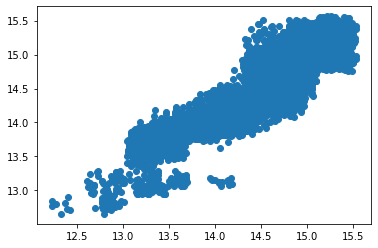

In [134]:
plt.scatter(y_test['log_Expected_CTC'], y_pred)

In [146]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7953972918105262


In [147]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7948775790490823

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [137]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


Total_Experience ---> 8.022952369360222
Total_Experience_in_field_applied ---> 3.7054247307922705
Department ---> 4.330149118071525
Role ---> 13.761128834463076
Industry ---> 3.4535549441035576
Organization ---> 3.572811709496099
Designation ---> 5.891819864034982
Education ---> 3.190268859892595
Graduation_Specialization ---> 3.8217072360509663
PG_Specialization ---> 4.13703701563383
Curent_Location ---> 3.590796500808697


# RandomForestRegressor

In [93]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=42)

In [94]:
y_pred = regressor.predict(X_test) 

In [95]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [96]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008505896316754694
Mean Squared Error: 0.0010996107861581715
Root Mean Squared Error: 0.03316037976498718


In [97]:
# Predicting the target values of the test set
y_pred = regressor.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.033


In [98]:
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  0.008618032302106726
MSE:  0.0011154818656918255


In [99]:
score = regressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9995373982957855


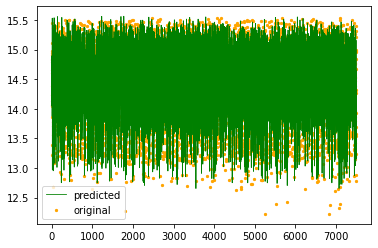

In [140]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="orange", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

# AdaBoostRegressor

In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [101]:
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)

AdaBoostRegressor(n_estimators=100)


In [102]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [103]:
scores = cross_val_score(ada_reg, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())


Mean cross-validataion score: 0.97


In [138]:
kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.96


In [105]:
ypred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 0.01
RMSE: 0.12


In [106]:
score = ada_reg.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9638600569932604


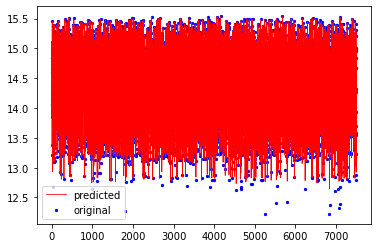

In [107]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# DecisionTreeRegressor

In [108]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [109]:
score = regressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 1.0


In [110]:
ypred = regressor.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  0.0016647121519094853
RMSE:  0.04080088420499592


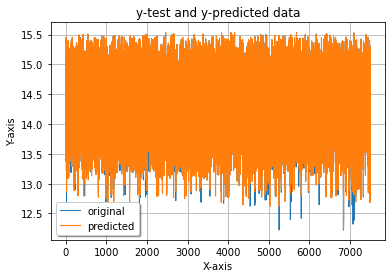

In [111]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# Support Vector Regression

In [112]:
from sklearn.svm import SVR

In [113]:
model = SVR(kernel = 'rbf')
# Fitting the SVR model to the data
model.fit(X_train, y_train)

SVR()

In [114]:
y_pred = model.predict(X_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.102


In [115]:
score = model.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9766773536176386


# GradientBoostingRegressor

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
model = GradientBoostingRegressor()

In [118]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [119]:
pred_final = model.predict(X_test)
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.0023200693362893012


In [120]:
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 0.04


In [121]:
score = model.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9940755872722311


# END